<a href="https://colab.research.google.com/github/satishgc227/Problem-statement-1-of-Horses/blob/main/Problem_statement_1_of_NYRA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopy.distance
from tqdm.auto import tqdm
tqdm.pandas()
from tqdm.auto import tqdm
tqdm.pandas()
!pip install utm
import utm
import plotly.graph_objects as go

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
df=pd.read_csv("/content/edited complete.csv",encoding='latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.



In [24]:
df.head()


,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,position_at_finish
0,AQU,01-01-2019,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090.0,8.0
1,AQU,01-01-2019,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090.0,8.0
2,AQU,01-01-2019,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090.0,8.0
3,AQU,01-01-2019,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090.0,8.0
4,AQU,01-01-2019,9,6,65,40.672596,-73.827742,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090.0,8.0


data.shape

In [4]:
df.shape

(990779, 18)

In [25]:
df.isnull().sum()

track_id               0
race_date              0
race_number            0
program_number         0
trakus_index           0
latitude               0
longitude              0
distance_id            0
course_type            0
track_condition        0
run_up_distance        0
race_type              0
purse                  0
post_time              0
weight_carried         0
jockey                 0
odds                   1
position_at_finish     1
dtype: int64

In [26]:
data = df.dropna(how='any',axis=0) 

In [7]:
df.isnull().sum()

track_id               0
race_date              0
race_number            1
program_number         1
trakus_index           1
latitude               1
longitude              1
distance_id            1
course_type            1
track_condition        1
run_up_distance        1
race_type              1
purse                  1
post_time              1
weight_carried         1
jockey                 1
odds                   1
position_at_finish     1
dtype: int64

  0%|          | 0/3 [00:00<?, ?it/s]

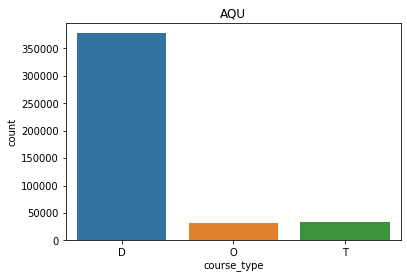

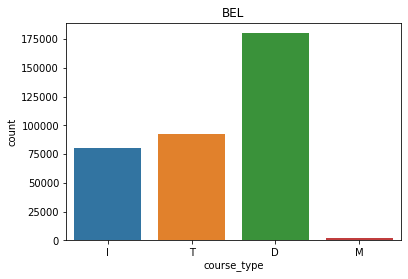

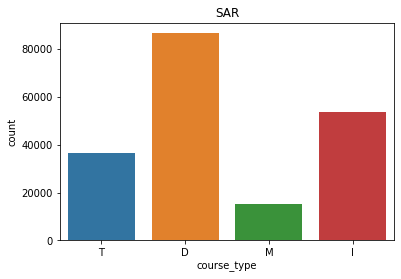

In [8]:
for t  in tqdm(df.track_id.unique()):
    sns.countplot(data = df[df.track_id == t], x='course_type')
    plt.title(t)
    plt.show()

Text(0.5, 1.0, 'Track name : SAR')

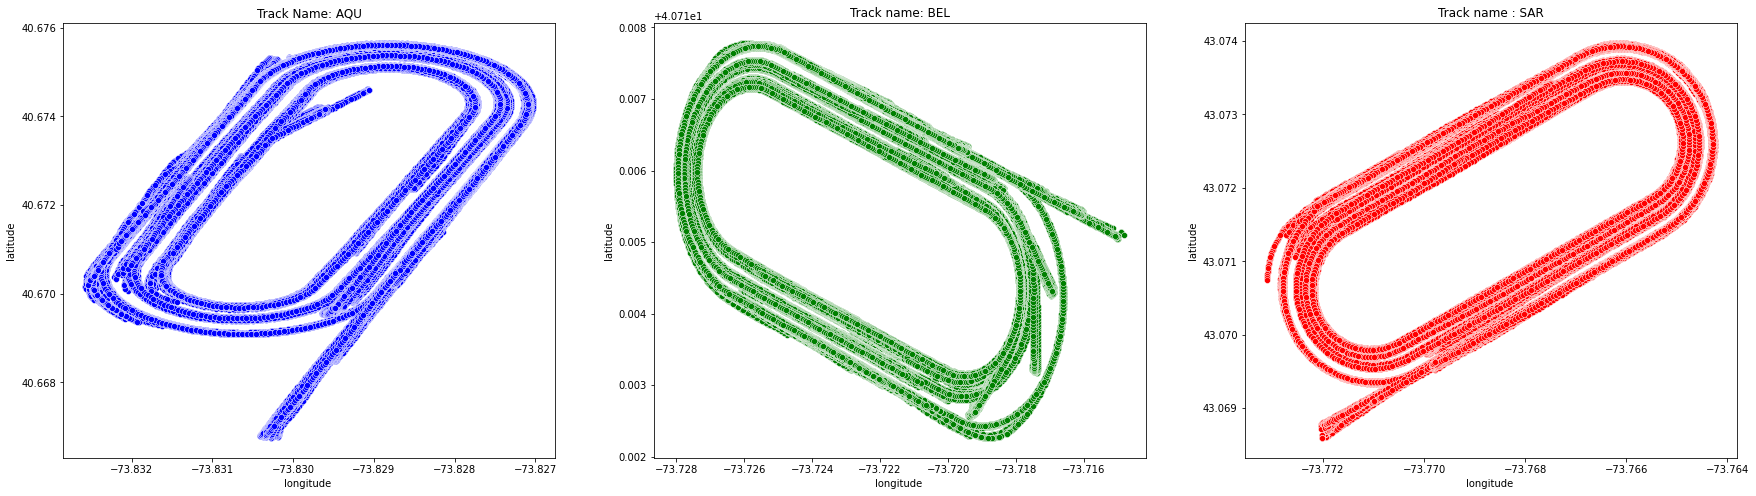

In [9]:
fig = plt.subplots(nrows = 1, ncols = 3, figsize = (30,8))

plt.subplot(1,3,1)
df1 = df[df['track_id'] == 'AQU']
sns.scatterplot(data =df1, x = 'longitude\xa0', y = 'latitude\xa0',color='Blue')
plt.title("Track Name: {}".format('AQU'))

plt.subplot(1,3,2)
df2=df[df['track_id'] == 'BEL']
sns.scatterplot(data=df2,x='longitude\xa0', y = 'latitude\xa0',color='Green')
plt.title("Track name: {}".format('BEL'))

plt.subplot(1,3,3)
df3=df[df['track_id']=='SAR']
sns.scatterplot(data=df3 ,x='longitude\xa0', y = 'latitude\xa0',color='Red')
plt.title("Track name : {}".format("SAR"))

In [11]:
# Taking the sample of data
df.race_date = pd.to_datetime(df.race_date)
sample_data=df[(df['track_id'] == 'AQU') & (df['race_number\xa0'] == 1) & (df['race_date'] == '2019-03-23')]
sample_data
# Selecting three horses from the sample data
program_number_1 = sample_data[sample_data['program_number\xa0']== '1'].sort_values('trakus_index\xa0')
program_number_2 = sample_data[sample_data['program_number\xa0']=='2'].sort_values('trakus_index\xa0')
program_number_4= sample_data[sample_data['program_number\xa0']=='4'].sort_values('trakus_index\xa0')



colors = ['red', 'green', 'blue']

data_trace0 = go.Scatter(x = program_number_1['longitude\xa0'], y = program_number_1['latitude\xa0'], mode = 'lines', line = {'width': 2, 'color': colors[0]}, name = 'Horse_1' )
data_trace1 = go.Scatter(x = program_number_2['longitude\xa0'], y = program_number_2['latitude\xa0'], mode = 'lines', line = {'width': 2, 'color': colors[1]}, name = 'Horse_2' )
data_trace2 = go.Scatter(x = program_number_4['longitude\xa0'], y = program_number_4['latitude\xa0'], mode = 'lines', line = {'width': 2, 'color': colors[2]}, name = 'Horse_3' )

data = [data_trace0, data_trace1, data_trace2]
layout = go.Layout(xaxis = {'range': [-73.833, -73.827], 'autorange': False, 'zeroline': False, 'title': 'Longitude\xa0'},
                   yaxis = {'range': [40.665, 40.676], 'autorange': False, 'zeroline': False, 'title': 'Latitude\xa0'},
                   title = 'Live race in track: AQU',
                   updatemenus = [{'type': 'buttons', 'buttons': [{'label': 'play', 'method': 'animate', 'args': [None, {'frame': {'duration': 40, 'transistion': 100}}]}] }])

horse_xx_1 = np.array(program_number_1['longitude\xa0'])
horse_yy_1 = np.array(program_number_1['latitude\xa0'])

horse_xx_2 = np.array(program_number_2['longitude\xa0'])
horse_yy_2 = np.array(program_number_2['latitude\xa0'])

horse_xx_3 = np.array(program_number_4['longitude\xa0'])
horse_yy_3 = np.array(program_number_4['latitude\xa0'])

frames = [go.Frame(data = [
    go.Scatter(x = [horse_xx_1[k]], y = [horse_yy_1[k]], mode = 'markers', marker = {'color': colors[0], 'size': 10, 'symbol': 'triangle-up'}),
    go.Scatter(x = [horse_xx_2[k]], y = [horse_yy_2[k]], mode = 'markers', marker = {'color': colors[1], 'size': 10, 'symbol': 'diamond-open'}),
    go.Scatter(x = [horse_xx_3[k]], y = [horse_yy_3[k]], mode = 'markers', marker = {'color': colors[2], 'size': 10, 'symbol': 'circle-open'})

]) for k in range(387)]

fig = go.Figure(data = data, layout = layout, frames = frames)

fig.show()


In [29]:
df['xy'] = np.array(utm.from_latlon(df['latitude\xa0'].values, df['longitude\xa0'].values)[:2]).T.tolist()

In [30]:
def get_speed(points):
    speed = [0]
    points = points.values
    for i in range(1, len(points)):
        speed.append(4 * np.linalg.norm(np.array(points[i]) - np.array(points[i-1])))
    return speed

df['speed'] = df.groupby(['track_id', 'race_date', 'race_number\xa0'])['xy'].progress_transform(get_speed)
df


  0%|          | 0/242 [00:00<?, ?it/s]

,track_id,race_date,race_number,program_number,trakus_index,latitude,longitude,distance_id,course_type,track_condition,run_up_distance,race_type,purse,post_time,weight_carried,jockey,odds,position_at_finish,xy,speed
0,AQU,01-01-2019,9,6,73,40.672946,-73.827587,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090.0,8.0,"[599088.5386649157, 4503112.780000094]",0.000000
1,AQU,01-01-2019,9,6,74,40.672990,-73.827568,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090.0,8.0,"[599090.1000253508, 4503117.721518921]",20.729285
2,AQU,01-01-2019,9,6,63,40.672510,-73.827781,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090.0,8.0,"[599072.8089421953, 4503064.139362002]",225.212046
3,AQU,01-01-2019,9,6,64,40.672553,-73.827762,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090.0,8.0,"[599074.3909913921, 4503068.925715356]",20.164150
4,AQU,01-01-2019,9,6,65,40.672596,-73.827742,600,D,GD,48,CLM,25000,420,120,Andre Shivnarine Worrie,2090.0,8.0,"[599075.9668556151, 4503073.731971427]",20.232032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123400,BEL,18-09-2019,6,2,193,40.714600,-73.725558,600,I,FM,135,ALW,66000,538,121,Wilmer A. Garcia,780.0,5.0,"[607644.8731254686, 4507856.6904769]",220.520451
123401,BEL,18-09-2019,6,2,194,40.714583,-73.725502,600,I,FM,135,ALW,66000,538,121,Wilmer A. Garcia,780.0,5.0,"[607649.6044785301, 4507854.869381071]",20.278892
123402,BEL,18-09-2019,6,2,195,40.714565,-73.725446,600,I,FM,135,ALW,66000,538,121,Wilmer A. Garcia,780.0,5.0,"[607654.4046223634, 4507853.02374928]",20.570946
123403,BEL,18-09-2019,6,2,196,40.714548,-73.725390,600,I,FM,135,ALW,66000,538,121,Wilmer A. Garcia,780.0,5.0,"[607659.1471220194, 4507851.191718]",20.336230
